In [169]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

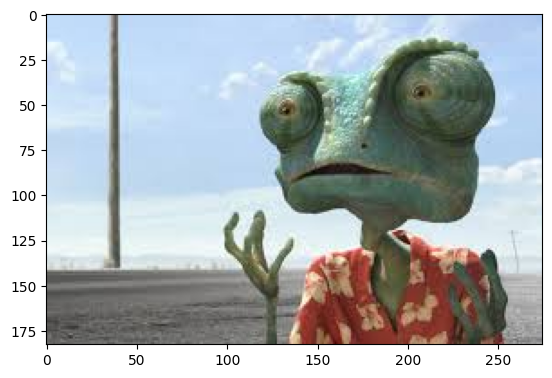

In [170]:
img=cv2.imread('image.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

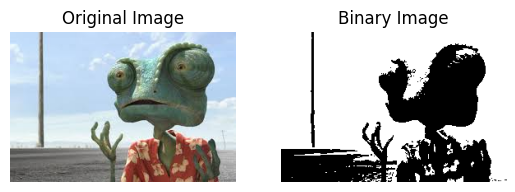

In [171]:
image=cv2.imread('image.jpeg')
img_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,binary_img=cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
plt.Figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_img, cmap='gray')  # Binary Image
plt.title("Binary Image")
plt.axis('off')

plt.show()

In [172]:
height, width=img_gray.shape[:2]
top_row=img_gray[0,:]
bottom_row=img_gray[height-1 ,:]
left_col=img_gray[1: height-1,0]
right_col=img_gray[1: height-1,width-1]

boundary_sum=top_row.sum()+bottom_row.sum()+left_col.sum()+right_col.sum()
print(boundary_sum)

161680


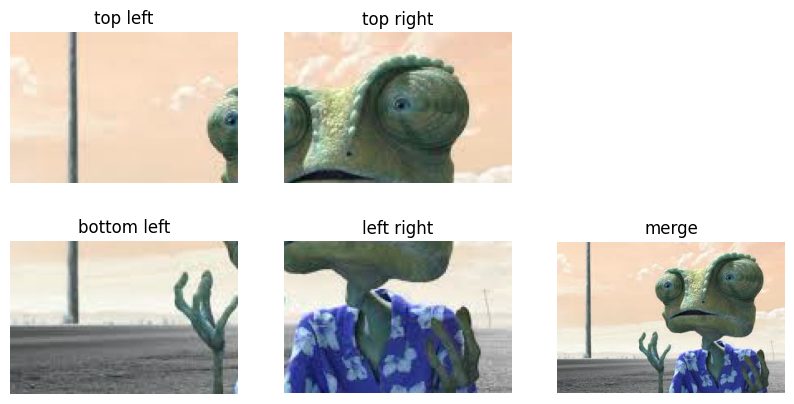

In [173]:
tl_img=img[: img.shape[0]//2, : img.shape[1]//2]
tr_img=img[: img.shape[0]//2, img.shape[1]//2 :]
bl_img=img[img.shape[0]//2 :, : img.shape[1]//2]
br_img=img[img.shape[0]//2 :,  img.shape[1]//2 :]

top=np.hstack((tl_img,tr_img))
bottom=np.hstack((bl_img,br_img))
combine=np.vstack((top,bottom))
plt.figure(figsize=(10,5))

plt.subplot(2,3,1)
plt.imshow(tl_img)
plt.title('top left')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(tr_img)
plt.title('top right')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(bl_img)
plt.title('bottom left')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(br_img)
plt.title('left right')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(combine)
plt.title('merge')
plt.axis('off')

plt.show()


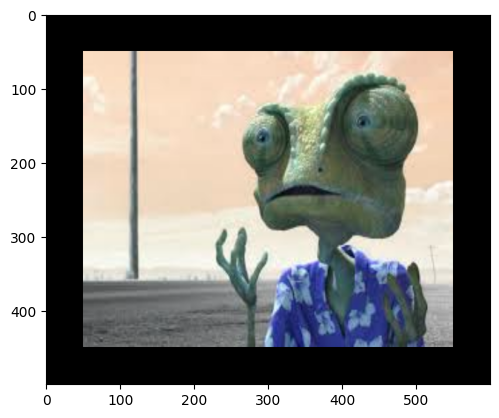

In [174]:
image=cv2.imread('image.jpeg')
new_height=500
new_width=400
resized_image= cv2.resize(image,(new_height,new_width))
top_border=50
bottom_border=50
left_border=50
right_border=50

border_color=[0,0,0]
border_image=cv2.copyMakeBorder(resized_image,top_border,bottom_border,left_border,right_border,cv2.BORDER_CONSTANT, value=border_color)
plt.Figure(figsize=(10,5))
plt.imshow(border_image)

histrogram

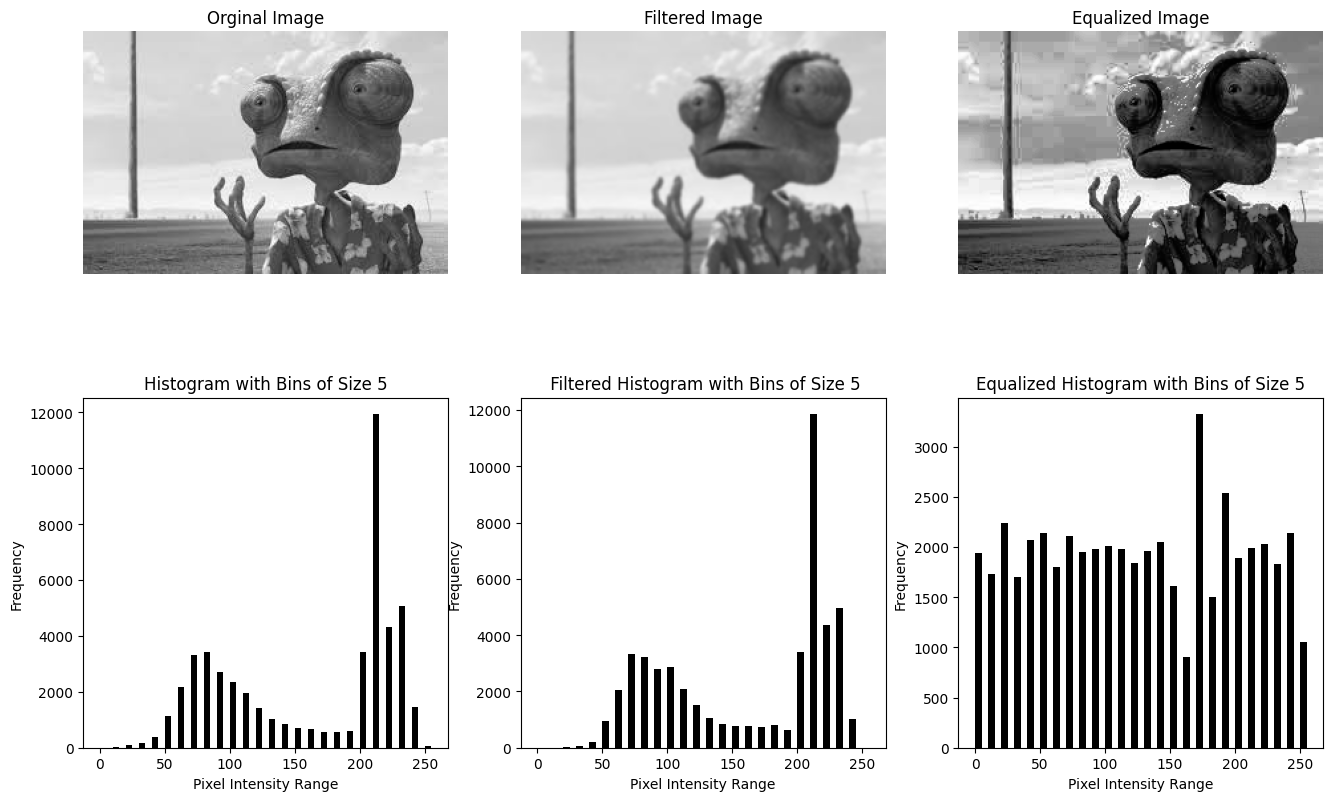

In [ ]:
img = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)

# Initialize histogram array for bins of size 10
hist = np.zeros(256 // 10 + 1, dtype=np.int32)

# Get image dimensions
rows, cols = img.shape[:2]

# Compute histogram
for i in range(rows):
    for j in range(cols):
        pixel = img[i][j] // 10  # Group pixel intensity into bins of size 10
        hist[pixel] += 1
        
#equalization
levels = 256
histogram = [0] * levels

for i in range(rows):
    for j in range(cols):
        pixel_value = img[i, j]
        histogram[pixel_value] += 1

cdf = [0] * levels
cdf[0] = histogram[0]

for i in range(1, levels):
    cdf[i] = cdf[i - 1] + histogram[i]

total_pixels = rows * cols
normalized_cdf = [int(c * (levels - 1) / total_pixels) for c in cdf]

equalized_image = np.zeros_like(img)

for i in range(rows):
    for j in range(cols):
        original_value = img[i][j]
        equalized_image[i][j] = normalized_cdf[original_value]

hist_ee =np.zeros(256 // 10 + 1, dtype=np.int32)
for i in range(rows):
    for j in range(cols):
        pixel= equalized_image[i][j]//10
        hist_ee[pixel]+=1

filtered = cv2.GaussianBlur(img,(5,5),0)
hist_fil = np.zeros(256 // 10 + 1, dtype=np.int32)
for i in range(rows):
    for j in range(cols):
        pixel= filtered[i][j]//10
        hist_fil[pixel]+=1

# Define the bin positions for the histogram
x = np.arange(256 // 10 + 1) *10

plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Orginal Image')
plt.axis('off')


plt.subplot(2,3,2)
plt.imshow(cv2.cvtColor(filtered,cv2.COLOR_BGR2RGB))
plt.title('Filtered Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Equalized Image")
plt.imshow(cv2.cvtColor(equalized_image,cv2.COLOR_BGR2RGB))
plt.axis('off')

# Plot the histogram
plt.subplot(2,3,4)
plt.bar(x, hist, width=5, align='edge', color='black', alpha=1)
plt.title("Histogram with Bins of Size 5")
plt.xlabel("Pixel Intensity Range")
plt.ylabel("Frequency")

plt.subplot(2,3,5)
plt.bar(x, hist_fil, width=5, align='edge', color='black', alpha=1)
plt.title(" Filtered Histogram with Bins of Size 5")
plt.xlabel("Pixel Intensity Range")
plt.ylabel("Frequency")

plt.subplot(2,3,6)
plt.bar(x, hist_ee, width=5, align='edge', color='black', alpha=1)
plt.title("Equalized Histogram with Bins of Size 5")
plt.xlabel("Pixel Intensity Range")
plt.ylabel("Frequency")

plt.show()


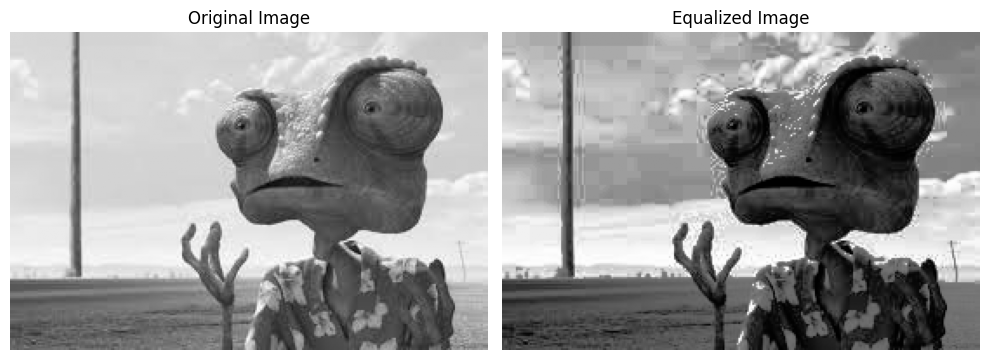

In [176]:
image = cv2.imread("image.jpeg", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Image not found. Please ensure 'cat2.jpg' is in the working directory.")

levels = 256
histogram = [0] * levels
rows, cols = image.shape

for i in range(rows):
    for j in range(cols):
        pixel_value = image[i, j]
        histogram[pixel_value] += 1

cdf = [0] * levels
cdf[0] = histogram[0]

for i in range(1, levels):
    cdf[i] = cdf[i - 1] + histogram[i]

total_pixels = rows * cols
normalized_cdf = [int(c * (levels - 1) / total_pixels) for c in cdf]

equalized_image = np.zeros_like(image)

for i in range(rows):
    for j in range(cols):
        original_value = image[i, j]
        equalized_image[i, j] = normalized_cdf[original_value]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()